# Assignment 2 for 論理生命学

ZHAO Yiming  6930-36-7719

#### Setup & Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm

np.random.seed(0)

#### Load and display

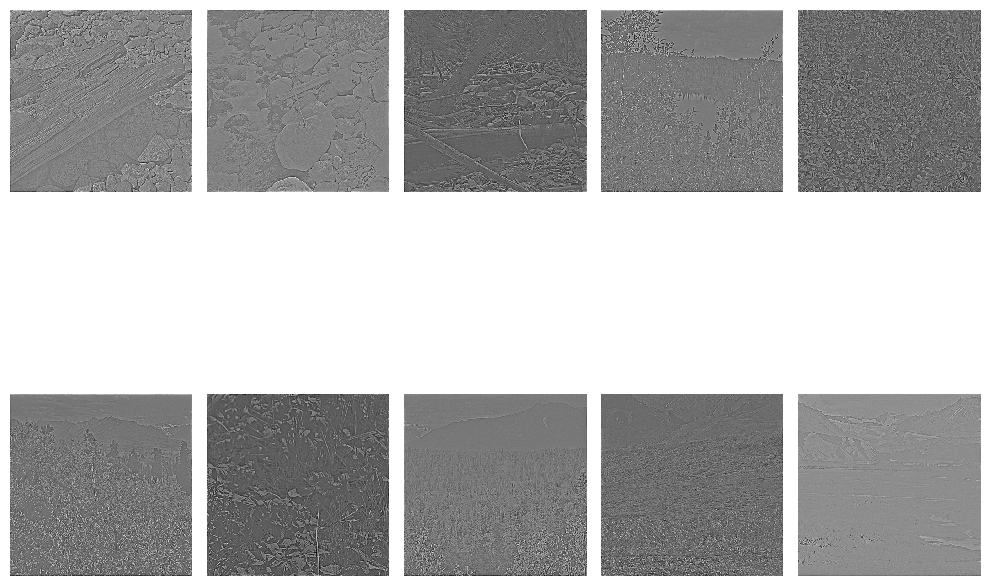

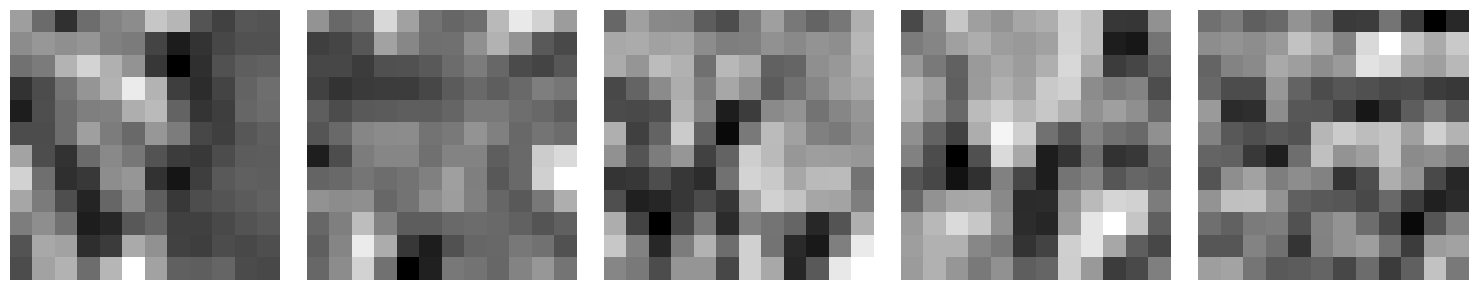

In [4]:
data = loadmat('IMAGES.mat')
images = data['IMAGES']

def extract_random_patches(images, patch_size=(12, 12), num_patches=5):
    patches = []
    img_height, img_width, num_images = images.shape
    for _ in range(num_patches):
        img_idx = np.random.randint(num_images)
        i = np.random.randint(img_height - patch_size[0] + 1)
        j = np.random.randint(img_width - patch_size[1] + 1)
        patch = images[i:i+patch_size[0], j:j+patch_size[1], img_idx]
        patches.append(patch)
    return np.array(patches)

def extract_random_patch_from_image1(images, patch_size=(12, 12)):
    img_idx = np.random.randint(images.shape[2])
    i = np.random.randint(images.shape[0] - patch_size[0] + 1)
    j = np.random.randint(images.shape[1] - patch_size[1] + 1)
    patch = images[i:i+patch_size[0], j:j+patch_size[1], img_idx]
    return patch


fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[:, :, i], cmap='gray', interpolation='nearest')
    ax.axis('off')
plt.tight_layout()
plt.show()

patches = extract_random_patches(images)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(patches[i], cmap='gray', interpolation='nearest')
    ax.axis('off')
plt.tight_layout()
plt.show()

#### E-step

In [5]:
def e_step(x, lamb, lamb_mat, Y, psi):
    gradient = np.dot(psi.T, (Y - np.dot(psi, x))) - np.dot(lamb_mat, x)
    hessian = -np.dot(psi.T, psi) - np.diag(lamb)
    x += np.dot(np.linalg.inv(-hessian), gradient)
    covariance = -np.linalg.inv(hessian)
    x_map = np.dot(np.linalg.inv(np.dot(psi.T, psi) + np.diag(lamb)), np.dot(psi.T, Y))
    lamb = 1 / np.diag(covariance + np.outer(x_map, x_map))
    lamb_mat = np.diag(lamb)
    return x, x_map, lamb, lamb_mat, covariance

#### M-step

In [6]:
def m_step(x_map, Y, covariance, psi):
    psi += 0.01 * (np.outer(Y, x_map) - np.dot(psi, (covariance + np.outer(x_map, x_map))))
    psi = psi / np.linalg.norm(psi, axis=0)
    return psi

#### Training loop

100%|██████████| 20000/20000 [02:34<00:00, 129.83it/s]


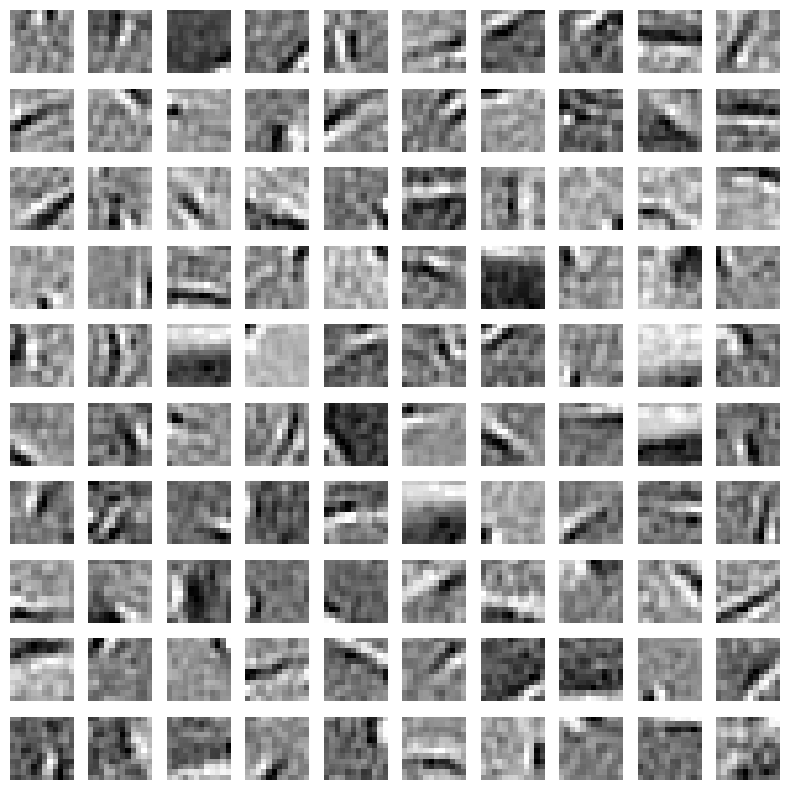

In [7]:
echos = 20000
psi = np.random.randn(144, 100)

for i in tqdm(range(echos)):
    x_map = None
    x = np.zeros(100)
    lamb = np.ones(100)
    lamb_mat = np.diag(lamb)
    
    Y = extract_random_patch_from_image1(images)
    Y = Y.flatten()
    Y = (Y - np.mean(Y)) / np.std(Y)
    
    # E-step
    for j in range(3):
        x, x_map, lamb, lamb_mat, covariance = e_step(x, lamb, lamb_mat, Y, psi)
    
    # M-step
    psi = m_step(x_map, Y, covariance, psi)

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for k, ax in enumerate(axes.flat):
    basis = psi[:, k].reshape(12, 12)
    ax.imshow(basis, cmap='gray', interpolation='nearest')
    ax.axis('off')

plt.tight_layout()
plt.show()